In [2]:
!nvidia-smi

Fri Nov  4 15:45:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P0    25W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch
from torch import nn

torch.device('cpu'), torch.device('cuda'), torch.device('cuda:1')

(device(type='cpu'), device(type='cuda'), device(type='cuda', index=1))

In [4]:
torch.cuda.device_count()

1

In [5]:
def try_gpu(i=0):  #@save
    """如果存在，则返回gpu(i)，否则返回cpu()"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def try_all_gpus():  #@save
    """返回所有可用的GPU，如果没有GPU，则返回[cpu(),]"""
    devices = [torch.device(f'cuda:{i}')
             for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

try_gpu(), try_gpu(10), try_all_gpus()

(device(type='cuda', index=0),
 device(type='cpu'),
 [device(type='cuda', index=0)])

In [6]:
x = torch.tensor([1, 2, 3])
x.device

device(type='cpu')

In [11]:
z = x.cuda()
x, z, z.is_cuda

(tensor([1, 2, 3]), tensor([1, 2, 3], device='cuda:0'), True)

In [8]:
x*z # 不同地方的张量不能做运算

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

尝试一个计算量更大的任务，比如大矩阵的乘法，看看CPU和GPU之间的速度差异。再试一个计算量很小的任务呢？

In [34]:
import time
gpu = torch.device("cuda:0")
n = 10000
X = torch.randn(n, n)
Y = X.to(gpu)

In [37]:
s = time.time()
Z = torch.matmul(Y, Y)
e = time.time()
print(Y.is_cuda)
print(f'gpu time cost: {round((e - s) * 1000, 2)}ms')

True
gpu time cost: 26.3ms


In [38]:
s = time.time()
Z = torch.matmul(X, X)
e = time.time()
print(X.is_cuda)
print(f'cpu time cost: {round((e - s) * 1000, 2)}ms')

False
cpu time cost: 7458.84ms


In [39]:
import matplotlib.pyplot as plt
cs, gs = [], []
ns = [1, 2, 4, 8, 16, 32, 64, 128, 256, 
      512, 1024, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 
      5200, 5400, 5600, 5800, 6000]
def cal(X):
    s = time.time()
    torch.matmul(X, X)
    e = time.time()
    return round((e - s) * 1000, 2)
for n in ns:
    X = torch.randn(n, n)
    Y = X.to(gpu)
    cs.append(cal(X))
    gs.append(cal(Y))

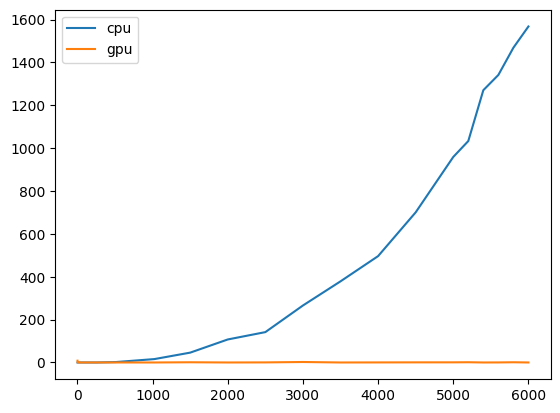

In [43]:
plt.plot(ns, cs, label="cpu")
plt.plot(ns, gs, label="gpu")
plt.legend()
plt.show()